In [2]:
! pip install newsapi-python
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='514d413ea7ae4bb69e4b019606e15882')
all_articles = newsapi.get_everything(q='',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2022-12-01',
                                      to='2022-12-02',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)
all_articles

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


{'status': 'ok',
 'totalResults': 639,
 'articles': [{'source': {'id': 'bbc-news', 'name': 'BBC News'},
   'author': None,
   'title': 'Larne beat Glenavon to move five points clear',
   'description': 'Larne edge Glenavon 1-0 at Mourneview Park to move five points clear at the top of the Irish Premiership table.',
   'url': 'https://www.bbc.co.uk/sport/football/63839788',
   'urlToImage': 'https://ichef.bbci.co.uk/live-experience/cps/624/cpsprodpb/002F/production/_127874000_dannywallace.jpg',
   'publishedAt': '2022-12-02T21:49:11Z',
   'content': 'Watch: Ward own goal gives Larne gritty win over Glenavon\r\nA Sean Ward own goal 10 minutes from time saw Larne edge past Glenavon 1-0 and move five points clear the top of the Irish Premiership table… [+1102 chars]'},
  {'source': {'id': 'bbc-news', 'name': 'BBC News'},
   'author': None,
   'title': 'URC: Edinburgh v Munster - radio & text',
   'description': "Follow live text and radio coverage of Edinburgh's United Rugby Championship m

In [3]:
all_articles['articles'][0]

{'source': {'id': 'bbc-news', 'name': 'BBC News'},
 'author': None,
 'title': 'Larne beat Glenavon to move five points clear',
 'description': 'Larne edge Glenavon 1-0 at Mourneview Park to move five points clear at the top of the Irish Premiership table.',
 'url': 'https://www.bbc.co.uk/sport/football/63839788',
 'urlToImage': 'https://ichef.bbci.co.uk/live-experience/cps/624/cpsprodpb/002F/production/_127874000_dannywallace.jpg',
 'publishedAt': '2022-12-02T21:49:11Z',
 'content': 'Watch: Ward own goal gives Larne gritty win over Glenavon\r\nA Sean Ward own goal 10 minutes from time saw Larne edge past Glenavon 1-0 and move five points clear the top of the Irish Premiership table… [+1102 chars]'}

In [5]:
for i in range(all_articles['totalResults']):
  title= all_articles['articles'][i]['title']
  news = all_articles['articles'][i]['content']
  print(title+'\n'+news+'\n'+'\n')

Larne beat Glenavon to move five points clear
Watch: Ward own goal gives Larne gritty win over Glenavon
A Sean Ward own goal 10 minutes from time saw Larne edge past Glenavon 1-0 and move five points clear the top of the Irish Premiership table… [+1102 chars]


URC: Edinburgh v Munster - radio & text
Friday night rugby under lights, what more could you want?
Edinburgh welcome Munster to the Scottish capital, as the URC continues apace. 
We'll have live text updates for you throughout, and you c… [+85 chars]


The surprising World Cup group stage XI picked by you
Who have you rated as the top performers in the group stages?
It has been the busiest World Cup group stage ever.
Forty eight group games have been packed into 13 hectic days at Qatar 2022, with th… [+4658 chars]


Addo steps down as Ghana boss after elimination
<table><tr><th>Fifa World Cup</th></tr>
<tr><td>Host nation: Qatar Dates: 20 November-18 December Coverage: Live on BBC TV, BBC iPlayer, BBC Radio 5 Live, BBC Radio Wal

IndexError: ignored

In [7]:
import pandas as pd

df = pd.DataFrame(all_articles['articles'])
df=df.drop(['source', 'author', 'url', 'urlToImage', 'publishedAt', 'description'], axis=1)
df.head()

,title,content
0,Larne beat Glenavon to move five points clear,Watch: Ward own goal gives Larne gritty win ov...
1,URC: Edinburgh v Munster - radio & text,"Friday night rugby under lights, what more cou..."
2,The surprising World Cup group stage XI picked...,Who have you rated as the top performers in th...
3,Addo steps down as Ghana boss after elimination,<table><tr><th>Fifa World Cup</th></tr>\r\n<tr...
4,Ospreys beaten as Sharks bounce back with victory,"Luke Morgan scored a fine try for Ospreys, who..."


In [8]:


label= [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
df['label']=label
df.head()
#print(df['label'].sum())

,title,content,label
0,Larne beat Glenavon to move five points clear,Watch: Ward own goal gives Larne gritty win ov...,0
1,URC: Edinburgh v Munster - radio & text,"Friday night rugby under lights, what more cou...",1
2,The surprising World Cup group stage XI picked...,Who have you rated as the top performers in th...,1
3,Addo steps down as Ghana boss after elimination,<table><tr><th>Fifa World Cup</th></tr>\r\n<tr...,0
4,Ospreys beaten as Sharks bounce back with victory,"Luke Morgan scored a fine try for Ospreys, who...",0


In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))


from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)


combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

!pip install contractions
import contractions


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 5.4 MB/s 
     |████████████████████████████████| 287 kB 44.5 MB/s 


In [9]:
df['content'][63].split()

['Not',
 'surprising',
 'really',
 'that',
 'Marc',
 'Skinner',
 'makes',
 'no',
 'changes',
 'from',
 'his',
 'Manchester',
 'United',
 'side',
 'that',
 'secured',
 'a',
 'dramatic',
 'late',
 'victory',
 'over',
 'Arsenal',
 'at',
 'Emirates',
 'Stadium',
 'last',
 'time',
 'out.',
 'Alessia',
 'Russo',
 'and',
 'Ella',
 'T…',
 '[+731',
 'chars]']

In [14]:
nltk.download('wordnet')
nltk.download('omw-1.4')
new_sent = ''
for token in df['content'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


'not surprising really that marc skinner make no change from his manchester united side that secured a dramatic late victory over arsenal at emirate stadium last time out. alessia russo and ella t… [+731 chars] '

In [56]:
def news_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
  
    new_text = contractions.fix(new_text)    

    new_text = re.sub(r"\W", " ", new_text)

    new_text = re.sub(r"[^a-zA-Z_]", " ", new_text)

    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [61]:
cleaned_news = []  
for ele in df['content']:
    cleaned_news.append(news_cleaner_without_stopwords(ele))

In [ ]:
cleaned_news[:5]

['larne edge glenavon 1-0 at mourneview park to move five point clear at the top of the irish premiership table. ',
 'follow live text and radio coverage of edinburgh is united rugby championship meeting with munster. ',
 'we asked you to rank the player in every world cup group stage game, here is your best xi and the standout individual performers. ',
 'otto addo resigns a ghana bos following their world cup group-stage elimination. ',
 "ospreys' hope of a first united rugby championship win in south africa are thwarted a shark responded to their historic home defeat by cardiff with victory in durban. "]

In [62]:
df['cleaned_news_w/o_SW'] = cleaned_news
df.head()

,title,content,label,cleaned_news_w/o_SW,cleaned_news_with_SW
0,Larne beat Glenavon to move five points clear,Watch: Ward own goal gives Larne gritty win ov...,0,watch ward own goal give larne gritty win over...,watch: ward goal give larne gritty win glenavo...
1,URC: Edinburgh v Munster - radio & text,"Friday night rugby under lights, what more cou...",1,friday night rugby under light what more could...,"friday night rugby lights, want? edinburgh wel..."
2,The surprising World Cup group stage XI picked...,Who have you rated as the top performers in th...,1,who have you rated a the top performer in the ...,rated performer group stages? busiest world cu...
3,Addo steps down as Ghana boss after elimination,<table><tr><th>Fifa World Cup</th></tr>\r\n<tr...,0,table tr th fifa world cup th tr tr td host na...,<table><tr><th>fifa world cup</th></tr> <tr><t...
4,Ospreys beaten as Sharks bounce back with victory,"Luke Morgan scored a fine try for Ospreys, who...",0,luke morgan scored a fine try for osprey who r...,"luke morgan scored fine try ospreys, remain aw..."


In [63]:
all_words = []
for t in df['content']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['Watch:', 'Ward', 'own', 'goal', 'gives', 'Larne', 'gritty', 'win', 'over', 'Glenavon', 'A', 'Sean', 'Ward', 'own', 'goal', '10', 'minutes', 'from', 'time', 'saw', 'Larne', 'edge', 'past', 'Glenavon', '1-0', 'and', 'move', 'five', 'points', 'clear', 'the', 'top', 'of', 'the', 'Irish', 'Premiership', 'table…', '[+1102', 'chars]', 'Friday', 'night', 'rugby', 'under', 'lights,', 'what', 'more', 'could', 'you', 'want?', 'Edinburgh']


1467

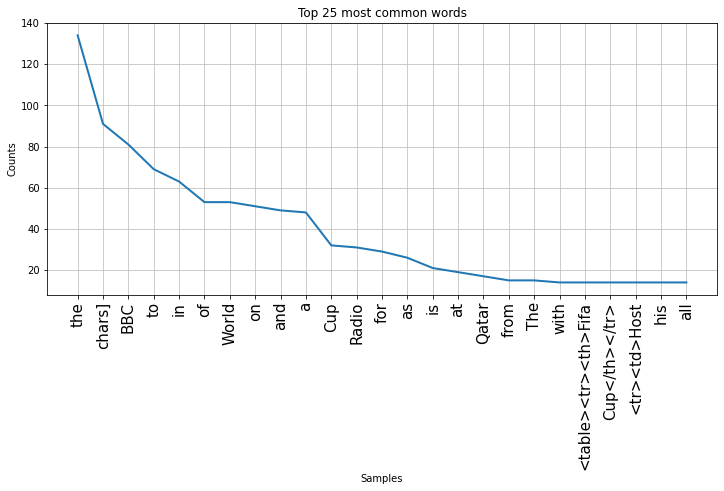

In [64]:
import matplotlib.pyplot as plt

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [65]:
all_words = []
for t in df['cleaned_news_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

len(set(all_words)) # this is the number of unique words in the list

['watch', 'ward', 'own', 'goal', 'give', 'larne', 'gritty', 'win', 'over', 'glenavon', 'a', 'sean', 'ward', 'own', 'goal', 'minute', 'from', 'time', 'saw', 'larne', 'edge', 'past', 'glenavon', 'and', 'move', 'five', 'point', 'clear', 'the', 'top', 'of', 'the', 'irish', 'premiership', 'table', 'char', 'friday', 'night', 'rugby', 'under', 'light', 'what', 'more', 'could', 'you', 'want', 'edinburgh', 'welcome', 'munster', 'to']


1086

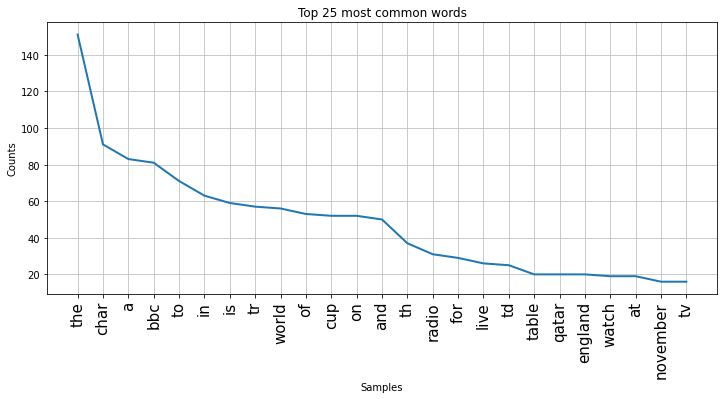

In [66]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [68]:

def news_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
  
    new_text = contractions.fix(new_text)    
      
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [69]:
cleaned_news = list(df['content'].apply(news_cleaner_with_stopwords))
print(cleaned_news[:10])

['watch: ward goal give larne gritty win glenavon sean ward goal minute time saw larne edge past glenavon 1-0 point clear irish premiership table… [+1102 chars] ', 'friday night rugby lights, want? edinburgh welcome munster scottish capital, urc continues apace. live text update throughout, [+85 chars] ', 'rated performer group stages? busiest world cup group stage ever. group game packed hectic day qatar 2022, th… [+4658 chars] ', '<table><tr><th>fifa world cup</th></tr> <tr><td>host nation: qatar dates: november-18 december coverage: live bbc tv, bbc iplayer, bbc radio live, bbc radio wales, bbc radio cymru, bbc sound… [+1353 chars] ', 'luke morgan scored fine try ospreys, remain away win urc october 2021 <table><tr><th>united rugby championship: shark ospreys</th></tr> <tr><td>sharks (6) 25</t… [+4170 chars] ', 'airline passenger european union (eu) soon able use phone effect sky. european commission ruled airline provide technology board planes, along… [+2376 chars] ', 'elon musk s

In [70]:
df['cleaned_news_with_SW'] = cleaned_news
df.head()

,title,content,label,cleaned_news_w/o_SW,cleaned_news_with_SW
0,Larne beat Glenavon to move five points clear,Watch: Ward own goal gives Larne gritty win ov...,0,watch ward own goal give larne gritty win over...,watch: ward goal give larne gritty win glenavo...
1,URC: Edinburgh v Munster - radio & text,"Friday night rugby under lights, what more cou...",1,friday night rugby under light what more could...,"friday night rugby lights, want? edinburgh wel..."
2,The surprising World Cup group stage XI picked...,Who have you rated as the top performers in th...,1,who have you rated a the top performer in the ...,rated performer group stages? busiest world cu...
3,Addo steps down as Ghana boss after elimination,<table><tr><th>Fifa World Cup</th></tr>\r\n<tr...,0,table tr th fifa world cup th tr tr td host na...,<table><tr><th>fifa world cup</th></tr> <tr><t...
4,Ospreys beaten as Sharks bounce back with victory,"Luke Morgan scored a fine try for Ospreys, who...",0,luke morgan scored a fine try for osprey who r...,"luke morgan scored fine try ospreys, remain aw..."


['watch:', 'ward', 'goal', 'give', 'larne', 'gritty', 'win', 'glenavon', 'sean', 'ward', 'goal', 'minute', 'time', 'saw', 'larne', 'edge', 'past', 'glenavon', '1-0', 'point', 'clear', 'irish', 'premiership', 'table…', '[+1102', 'chars]', 'friday', 'night', 'rugby', 'lights,', 'want?', 'edinburgh', 'welcome', 'munster', 'scottish', 'capital,', 'urc', 'continues', 'apace.', 'live', 'text', 'update', 'throughout,', '[+85', 'chars]', 'rated', 'performer', 'group', 'stages?', 'busiest']


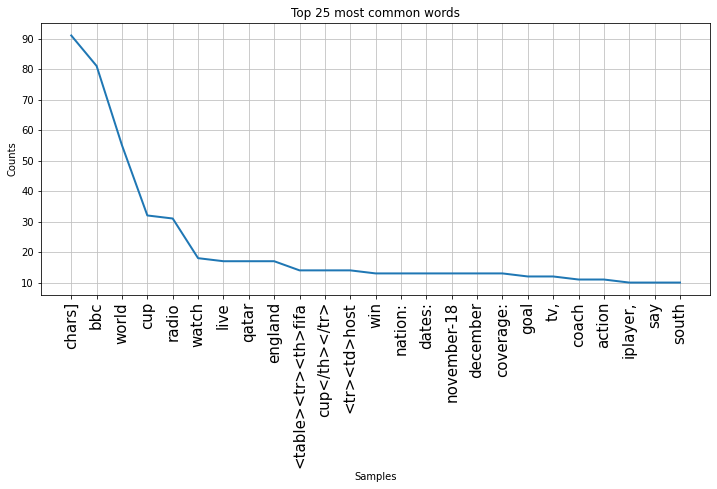

1184

In [72]:
all_words = []
for t in df['cleaned_news_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

len(set(all_words))

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(df['cleaned_news_w/o_SW'])

In [74]:
CV_features.shape

(100, 1072)

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, df['label'], test_size=0.25, stratify=df['label'], random_state=1000)

In [76]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score)  

0.9466666666666667
0.4


In [98]:
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)

0.6
0.56


In [111]:
from sklearn.neighbors import KNeighborsClassifier                 #import the algorithm
kmodel = KNeighborsClassifier(n_neighbors=9) 


kmodel.fit(X_train,y_train)      
print(kmodel.score(X_test,y_test))
print(kmodel.score(X_train,y_train))

0.56
0.64


In [104]:
kmodel.fit(X_train,y_train)      
print(kmodel.score(X_test,y_test))
print(kmodel.score(X_train,y_train))



0.48
0.7066666666666667
